In [2]:
from google.colab import files

# This will prompt you to upload a file
uploaded = files.upload()

Saving description.txt to description.txt
Saving test_data.txt to test_data.txt
Saving train_data.txt to train_data.txt


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re

In [6]:
# Load the training data
train_df = pd.read_csv('train_data.txt', delimiter=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])

# Load the test data
test_df = pd.read_csv('test_data.txt', delimiter=':::', engine='python', names=['ID', 'Title', 'Description'])

# Check the first few rows of the data
print(train_df.head())
print(test_df.head())

   ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...  
   ID                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description  
0   L.R. Brane loves his life -

In [8]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Fit and transform the training data descriptions, and transform the test data descriptions
X_train = tfidf.fit_transform(train_df['Description'])
X_test = tfidf.transform(test_df['Description'])

# Labels (Genres)
y_train = train_df['Genre']

In [9]:
# Initialize the classifier
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
# Predict the genres for the test data
y_pred = model.predict(X_test)

# Add predictions to the test DataFrame
test_df['Predicted_Genre'] = y_pred

# Display the first few rows of the predictions
print(test_df.head())

   ID                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description Predicted_Genre  
0   L.R. Brane loves his life - his car, his apar...          short   
1   Spain, March 1964: Quico is a very naughty ch...          drama   
2   One year in the life of Albin and his family ...    documentary   
3   His father has died, he hasn't spoken with hi...          drama   
4   Before he was known internationally as a mart...          drama   


In [13]:
import pickle

# Save the model
with open('genre_prediction_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)

In [14]:
uploaded = files.upload()

Saving test_data_solution.txt to test_data_solution.txt


In [15]:
# Load the test data solution
test_solution_df = pd.read_csv('test_data_solution.txt', delimiter=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])

# Display the first few rows to ensure it's loaded correctly
print(test_solution_df.head())

   ID                          Title          Genre  \
0   1          Edgar's Lunch (1998)       thriller    
1   2      La guerra de papá (1977)         comedy    
2   3   Off the Beaten Track (2010)    documentary    
3   4        Meu Amigo Hindu (2015)          drama    
4   5             Er nu zhai (1955)          drama    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...  


In [16]:
# True genres from the test solution
y_true = test_solution_df['Genre']

# Descriptions for prediction (these should match the descriptions in the test set)
X_test_solution = tfidf.transform(test_solution_df['Description'])

In [17]:
# Predict the genres for the test data
y_pred = model.predict(X_test_solution)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Detailed classification report
print(classification_report(y_true, y_pred))

Accuracy: 58.39%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.48      0.29      0.36      1314
       adult        0.60      0.24      0.34       590
   adventure        0.58      0.17      0.26       775
   animation        0.52      0.07      0.12       498
   biography        0.00      0.00      0.00       264
      comedy        0.53      0.58      0.55      7446
       crime        0.36      0.04      0.07       505
 documentary        0.67      0.85      0.75     13096
       drama        0.54      0.77      0.64     13612
      family        0.49      0.09      0.15       783
     fantasy        0.56      0.06      0.10       322
   game-show        0.92      0.51      0.65       193
     history        0.00      0.00      0.00       243
      horror        0.64      0.57      0.61      2204
       music        0.67      0.45      0.54       731
     musical        0.33      0.02      0.04       276
     mystery        0.36      0.02      0.03       318
        n

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

Accuracy: 58.39%


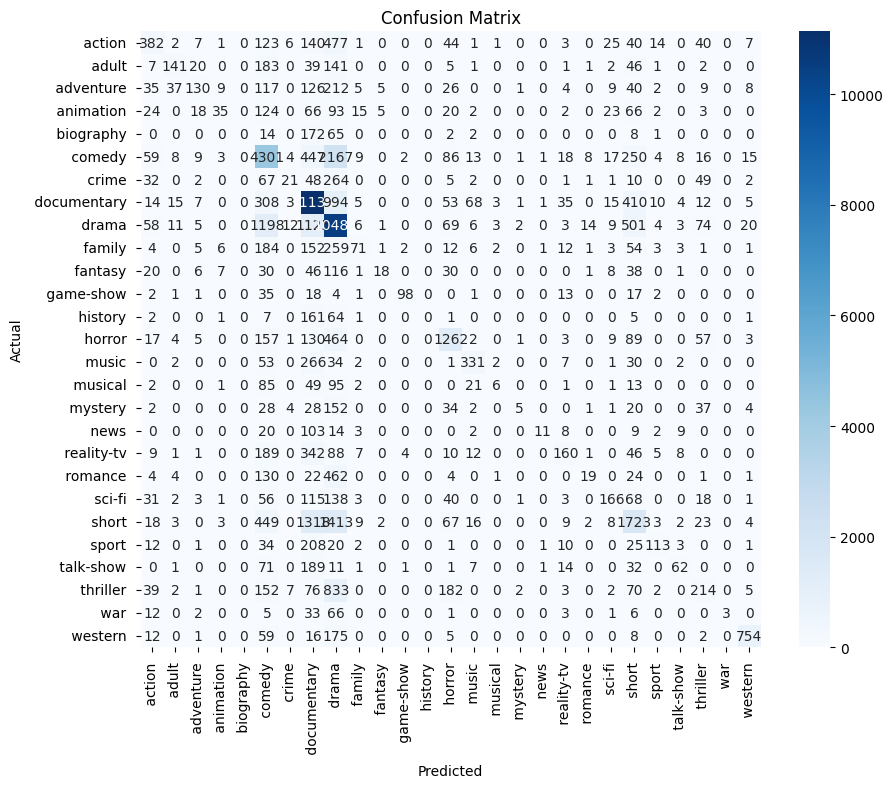

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-19-88cb2754012e>:25: FutureWarning: 

Passing `pa

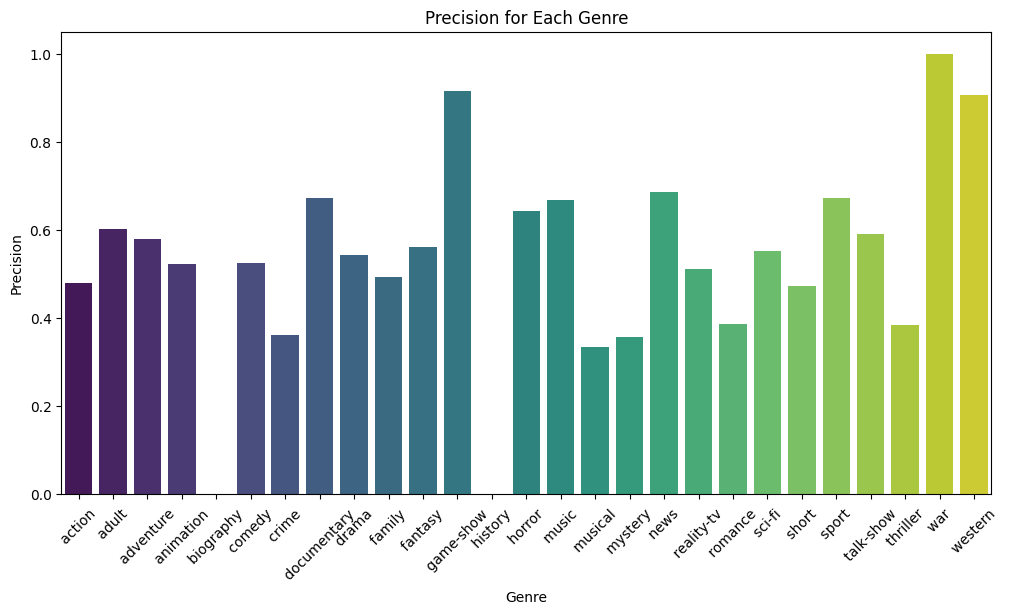

In [19]:
# Predict the genres for the test data
y_pred = model.predict(X_test_solution)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Detailed classification report
report = classification_report(y_true, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plot accuracy for each genre
plt.figure(figsize=(12, 6))
sns.barplot(x=report_df.index[:-3], y=report_df['precision'][:-3], palette='viridis')
plt.title('Precision for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Precision')
plt.xticks(rotation=45)
plt.show()